> # Time Series Forecasting And Portfolio Optimization (GMF) Investments

In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore
import yfinance as yf # type: ignore
from statsmodels.tsa.seasonal import seasonal_decompose # type: ignore

> ## ♻️ Preprocess and Explore the Data

> > ##### Load, Prepare and understand the historical financial data for Tesla, BND, and SPY over the period from January 1, 2015, to  January 31, 2025., using YFinance

> ## ⏳ Data Loading

In [3]:
from scripts.data_loader import loadData
tsla_data, bnd_data, spy_data = loadData()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


> ## ✅ Check Loaded Dataset

In [4]:
from scripts.data_loader import format_date

data = format_date

> ## 🛢️ TSLA Datasets

In [5]:
rows, columns = tsla_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2535
Number of columns: 6


In [6]:
tsla_data.head(rows)


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,,TSLA
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...
2025-01-24,414.450012,418.880005,405.779999,406.579987,406.579987,56427100
2025-01-27,394.799988,406.690002,389.000000,397.149994,397.149994,58125500


In [7]:
tsla_data.describe()


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,,TSLA
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,117.877662,120.474827,115.097514,117.848209,117.848209,1.120308e+08
std,116.611575,119.236025,113.698930,116.508288,116.508288,7.387509e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,17.259334,17.527667,16.942000,17.228000,17.228000,6.680295e+07
50%,31.299999,32.329334,29.760000,30.298000,30.298000,9.264180e+07
75%,222.653336,226.696671,217.061661,221.525002,221.525002,1.294283e+08
max,475.899994,488.540009,457.510010,479.859985,479.859985,9.140820e+08


In [8]:
tsla_data.dtypes


Price      Ticker
Open       TSLA      float64
High       TSLA      float64
Low        TSLA      float64
Close      TSLA      float64
Adj Close            float64
Volume     TSLA        int64
dtype: object

In [9]:
tsla_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, TSLA)    2535 non-null   float64
 1   (High, TSLA)    2535 non-null   float64
 2   (Low, TSLA)     2535 non-null   float64
 3   (Close, TSLA)   2535 non-null   float64
 4   (Adj Close, )   2535 non-null   float64
 5   (Volume, TSLA)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


> ## 🛢️ BND Dataset

In [10]:
rows, columns = bnd_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2535
Number of columns: 6


In [11]:
bnd_data.head(rows)

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,BND,BND,BND,BND,,BND
Date,,,,,,
2015-01-02,62.221043,62.417302,62.213493,62.387108,62.387108,2218800
2015-01-05,62.455030,62.590901,62.424836,62.568256,62.568256,5820100
2015-01-06,62.673884,62.938075,62.673884,62.749367,62.749367,3887600
2015-01-07,62.756923,62.862599,62.688991,62.787117,62.787117,2433400
2015-01-08,62.734306,62.734306,62.628630,62.689018,62.689018,1873400
...,...,...,...,...,...,...
2025-01-24,71.552731,71.642168,71.423541,71.592484,71.592484,5555700
2025-01-27,71.890611,71.989996,71.811114,71.970116,71.970116,8621200


In [12]:
bnd_data.describe()

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,BND,BND,BND,BND,,BND
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,69.087205,69.184950,68.980311,69.083443,69.083443,4.233200e+06
std,4.778948,4.786136,4.767924,4.777898,4.777898,2.796083e+06
min,61.707448,61.753207,61.638820,61.676945,61.676945,0.000000e+00
25%,65.357818,65.435036,65.280804,65.370331,65.370331,2.057700e+06
50%,68.107128,68.254321,67.967078,68.125977,68.125977,3.805800e+06
75%,72.629113,72.729560,72.512545,72.663254,72.663254,5.626700e+06
max,78.650405,78.685530,78.553773,78.588905,78.588905,3.193720e+07


In [13]:
bnd_data.dtypes

Price      Ticker
Open       BND       float64
High       BND       float64
Low        BND       float64
Close      BND       float64
Adj Close            float64
Volume     BND         int64
dtype: object

In [14]:
bnd_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Open, BND)    2535 non-null   float64
 1   (High, BND)    2535 non-null   float64
 2   (Low, BND)     2535 non-null   float64
 3   (Close, BND)   2535 non-null   float64
 4   (Adj Close, )  2535 non-null   float64
 5   (Volume, BND)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


> ## 🛢️ SPY Datasets

In [15]:
rows, columns = spy_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2535
Number of columns: 6


In [16]:
spy_data.head(rows)


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,SPY,SPY,SPY,SPY,,SPY
Date,,,,,,
2015-01-02,173.391052,173.811130,171.542703,172.592896,172.592896,121465900
2015-01-05,171.534282,171.702310,169.165053,169.475906,169.475906,169632600
2015-01-06,169.786811,170.316112,167.073115,167.879669,167.879669,209151400
2015-01-07,169.223882,170.316085,168.770204,169.971619,169.971619,125346700
2015-01-08,171.399871,173.206211,171.383078,172.987762,172.987762,147217800
...,...,...,...,...,...,...
2025-01-24,609.809998,610.780029,606.799988,607.969971,607.969971,34604700
2025-01-27,594.809998,599.690002,594.640015,599.369995,599.369995,70361100


In [17]:
spy_data.describe()


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,SPY,SPY,SPY,SPY,,SPY
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,316.021386,317.725662,314.157890,316.067403,316.067403,8.714655e+07
std,117.921618,118.486410,117.269902,117.926910,117.926910,4.487253e+07
min,156.354943,157.864136,154.676898,156.800842,156.800842,2.027000e+07
25%,214.972477,215.702238,214.206900,214.841988,214.841988,5.862005e+07
50%,277.230842,277.919580,276.073703,277.117828,277.117828,7.642870e+07
75%,406.100256,409.134325,402.830858,405.869202,405.869202,1.018866e+08
max,609.809998,610.780029,606.799988,609.750000,609.750000,5.072443e+08


In [18]:
spy_data.dtypes


Price      Ticker
Open       SPY       float64
High       SPY       float64
Low        SPY       float64
Close      SPY       float64
Adj Close            float64
Volume     SPY         int64
dtype: object

In [19]:
spy_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Open, SPY)    2535 non-null   float64
 1   (High, SPY)    2535 non-null   float64
 2   (Low, SPY)     2535 non-null   float64
 3   (Close, SPY)   2535 non-null   float64
 4   (Adj Close, )  2535 non-null   float64
 5   (Volume, SPY)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


In [20]:
spy_data.dtypes

Price      Ticker
Open       SPY       float64
High       SPY       float64
Low        SPY       float64
Close      SPY       float64
Adj Close            float64
Volume     SPY         int64
dtype: object

>>> ### ⚠️ Check missing values

In [21]:
from scripts.data_cleaning import preprocess_data
tsla_data = preprocess_data(tsla_data,"TSLA")
bnd_data = preprocess_data(bnd_data,"BND")
spy_data = preprocess_data(spy_data,"SPY")

TSLA Missing values:
Price      Ticker
Open       TSLA      0
High       TSLA      0
Low        TSLA      0
Close      TSLA      0
Adj Close            0
Volume     TSLA      0
dtype: int64
BND Missing values:
Price      Ticker
Open       BND       0
High       BND       0
Low        BND       0
Close      BND       0
Adj Close            0
Volume     BND       0
dtype: int64
SPY Missing values:
Price      Ticker
Open       SPY       0
High       SPY       0
Low        SPY       0
Close      SPY       0
Adj Close            0
Volume     SPY       0
dtype: int64


> ## 🚀 Exploratory Data Analysis (EDA) and Outlier Detection

In [22]:
from scripts.plots import*

> ### 💵 Close Price Over Time

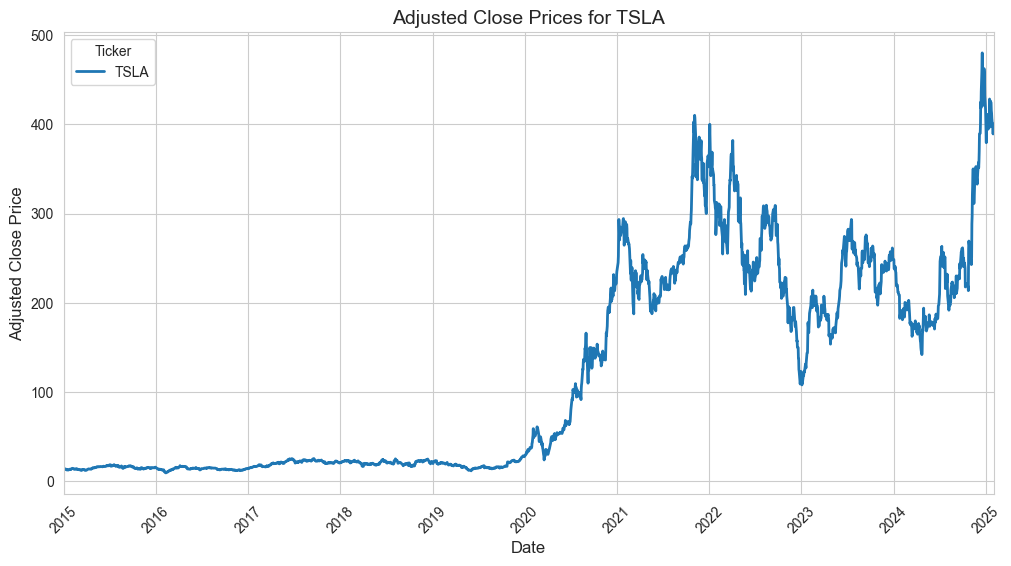

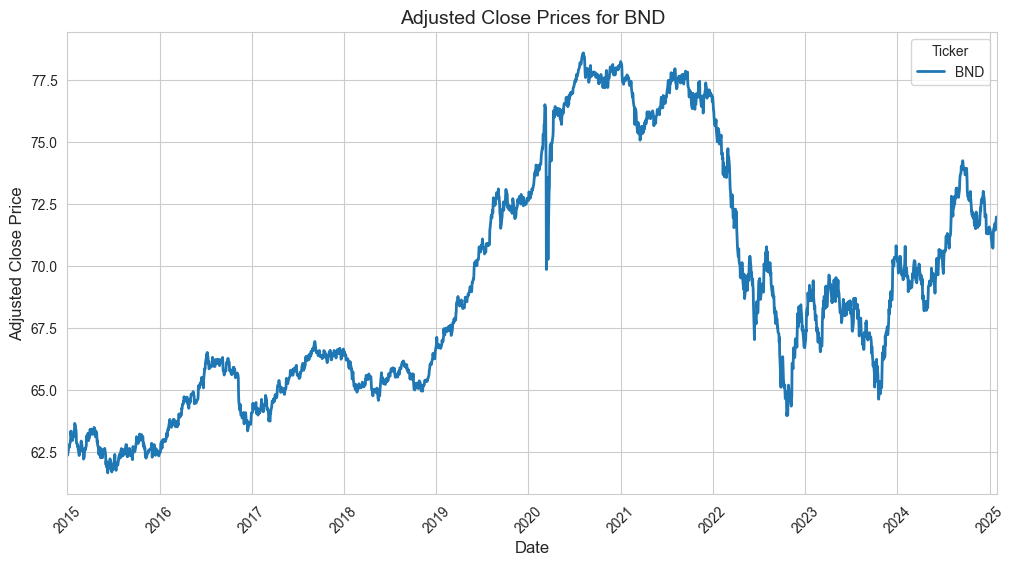

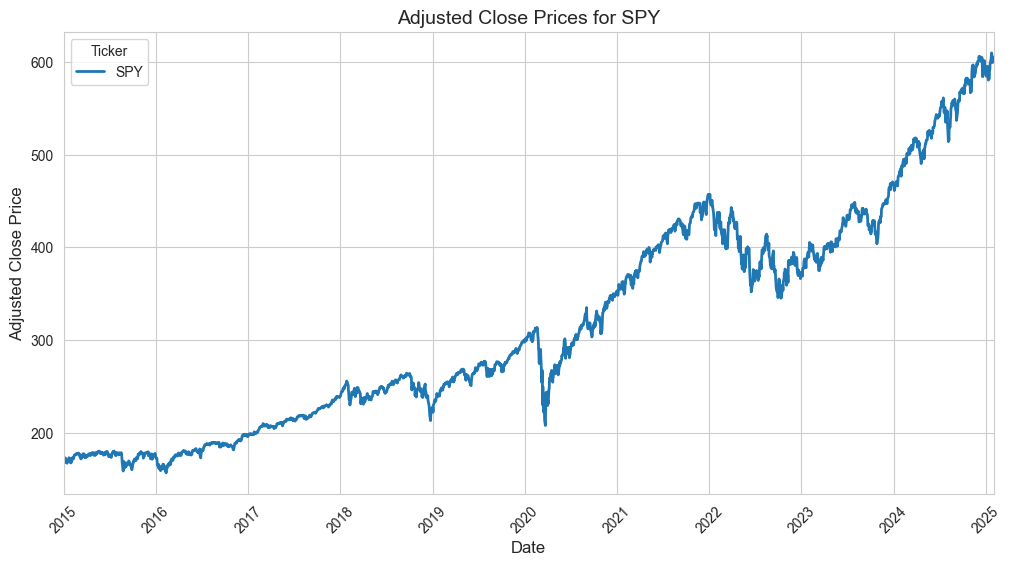

In [23]:
closePriceOverTime([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])

> ### 🗓️ Daily Return

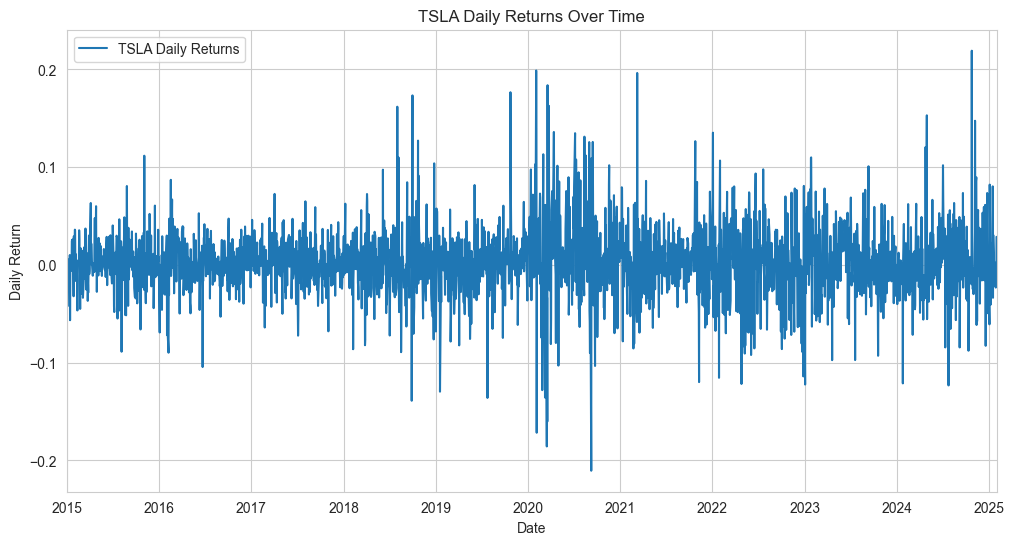

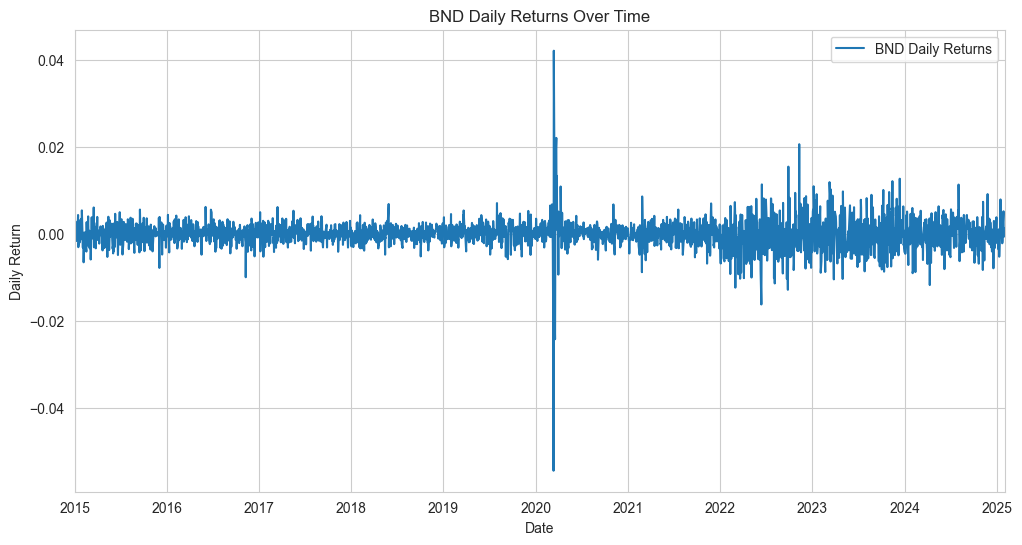

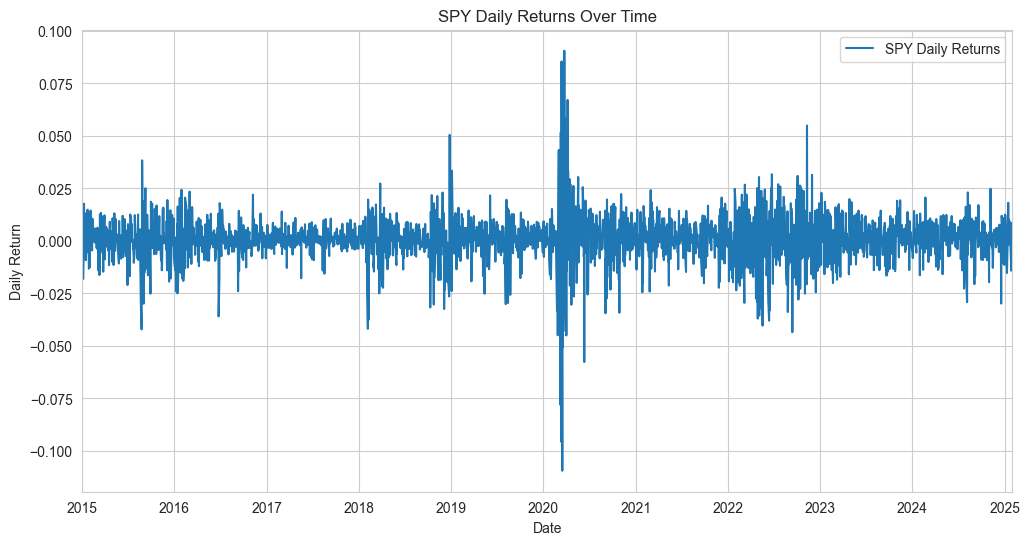

In [24]:
dailyReturn([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


>> ## Volatility with shaded volatility range

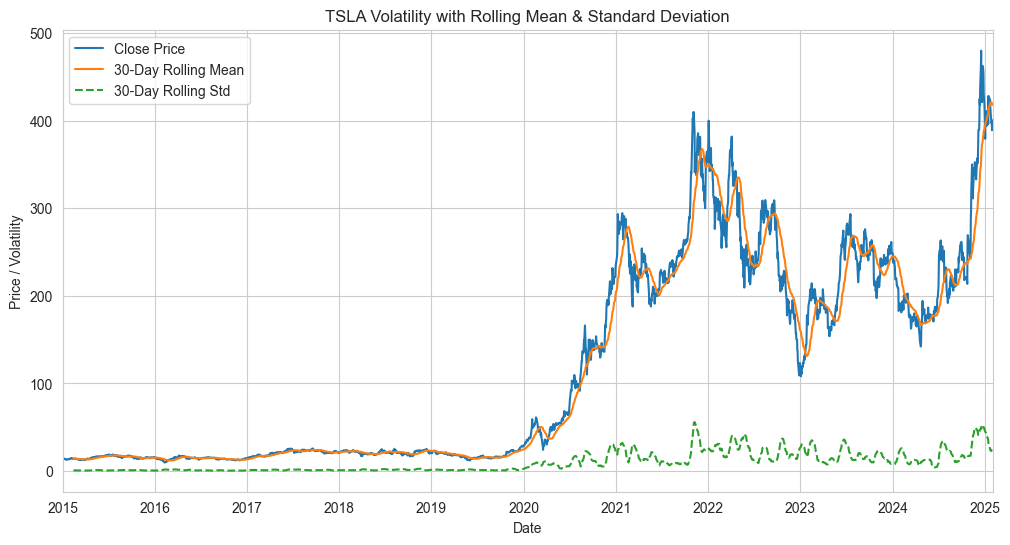

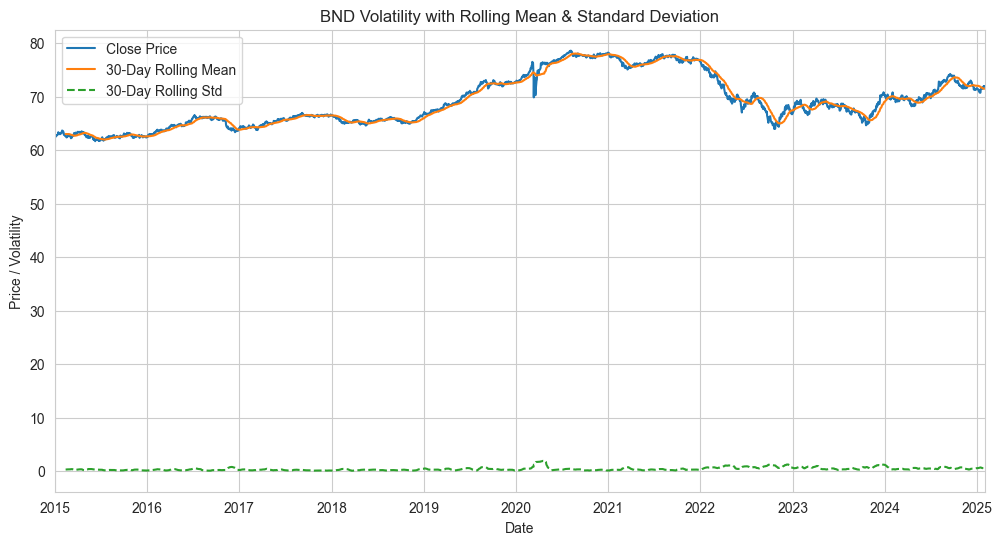

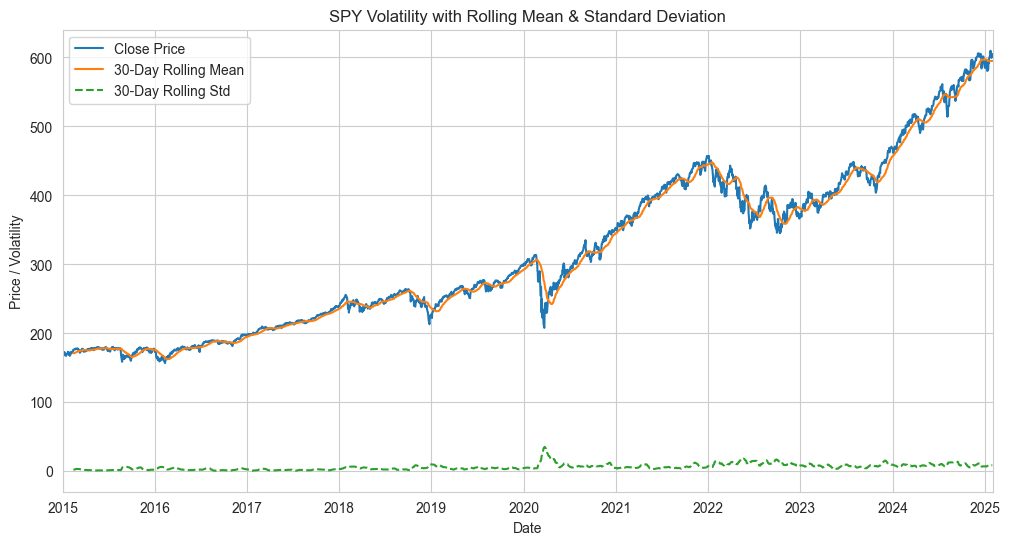

In [25]:
rollingAvgAndStd([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


>> ## Outliers

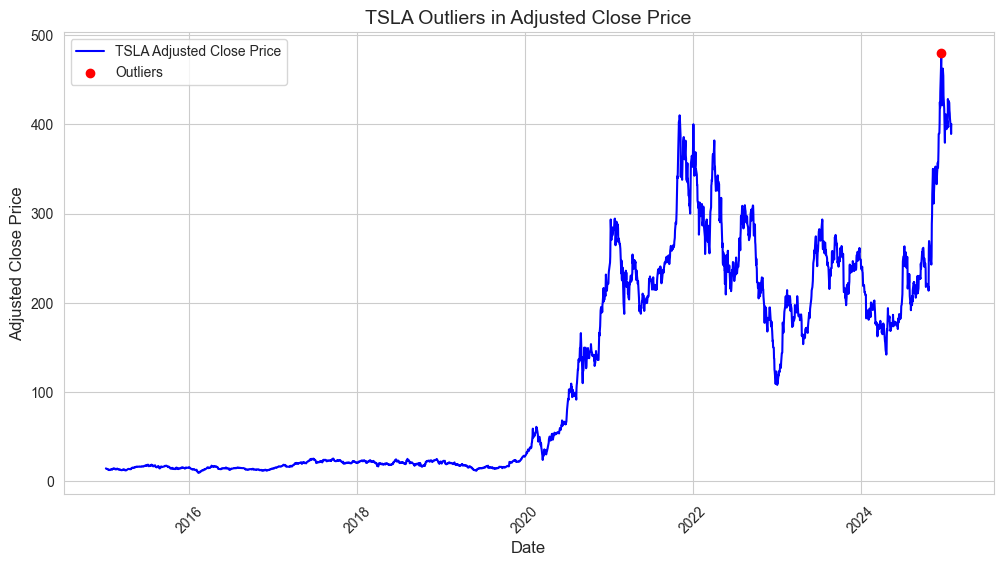


Outliers for TSLA:
                 Price   Z-Score Ticker
Date                                   
2024-12-17  479.859985  3.107176   TSLA


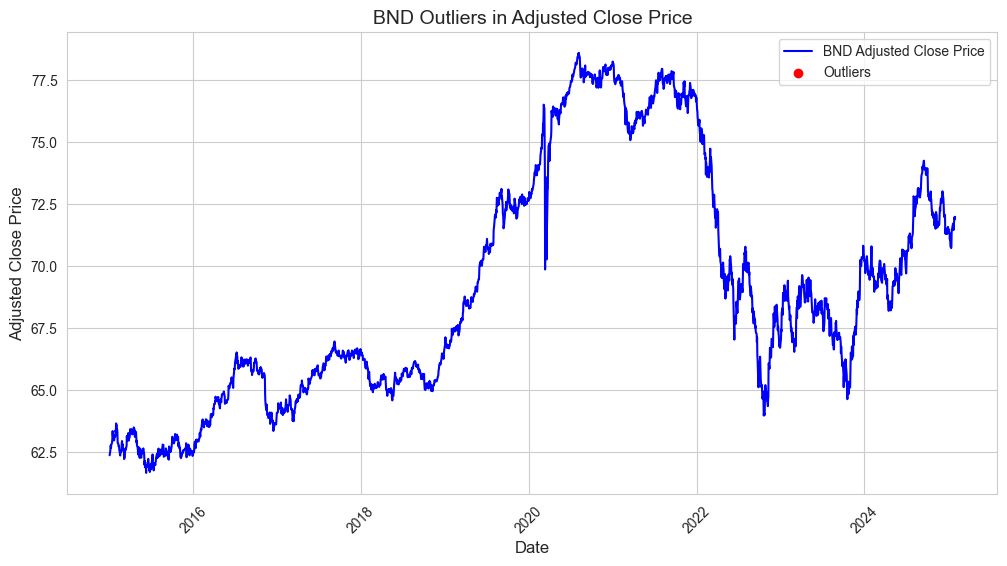


Outliers for BND:
Empty DataFrame
Columns: [Price, Adj Close, Z-Score]
Index: []


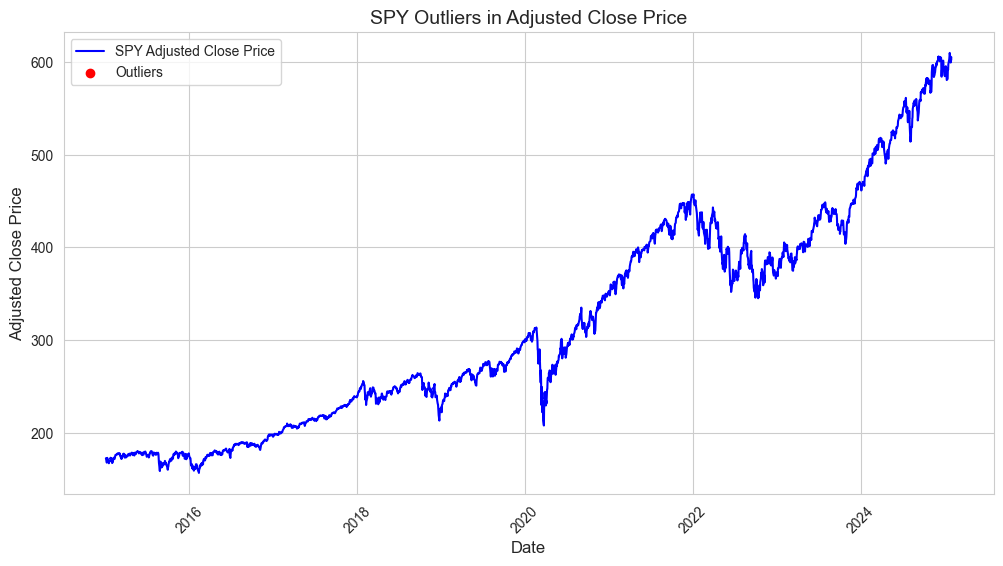


Outliers for SPY:
Empty DataFrame
Columns: [Price, Adj Close, Z-Score]
Index: []


In [26]:
detect_outliers([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])

>> ### Remove Outlier

In [27]:
cleaned_tsla, cleaned_bnd, cleaned_spy = remove_outliers([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])



Removed Outliers for TSLA:
Price        Adj Close   Z-Score
Ticker                          
Date                            
2024-12-17  479.859985  3.107176

Removed Outliers for BND:
No outliers found.

Removed Outliers for SPY:
No outliers found.


In [28]:
print(cleaned_tsla.loc['2024-12-17'] if '2024-12-17' in cleaned_tsla.index else "Outlier removed!")


Outlier removed!


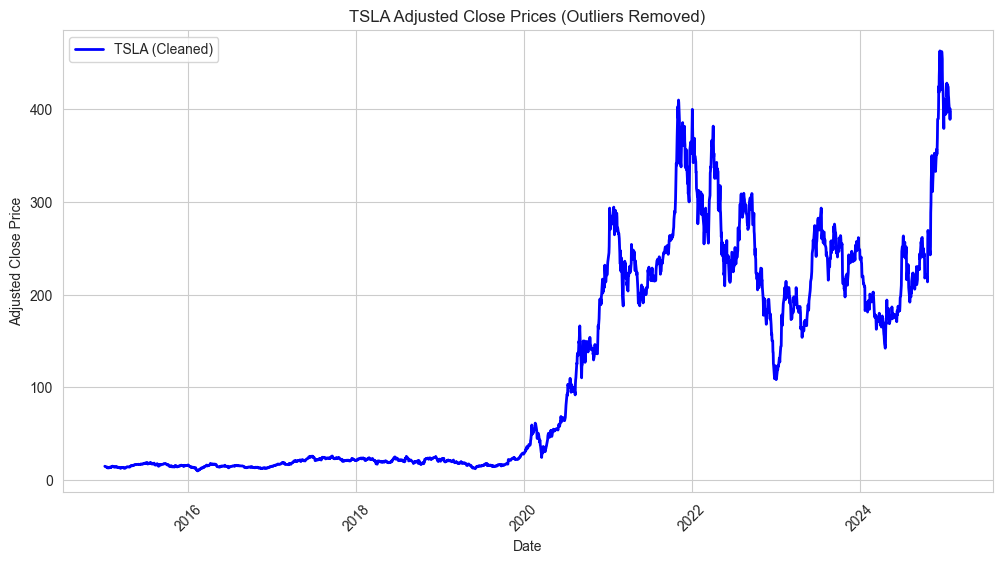

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_tsla.index, cleaned_tsla['Adj Close'], label="TSLA (Cleaned)", linewidth=2, color="blue")
plt.title("TSLA Adjusted Close Prices (Outliers Removed)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


>> ## Unusual High and Low Returns

>>> ### Calculate Daily returns

In [30]:
from scripts.plots import calc_daily_return
calc_daily_return

<function scripts.plots.calc_daily_return(stockData, tickers)>

>>> ### Daily Percentage Change

In [31]:
for df in [tsla_data, bnd_data, spy_data]:
    if 'Close' in df.columns and 'Daily Return' not in df.columns:
        df['Daily Return'] = df['Close'].pct_change() * 100  # Convert to percentage


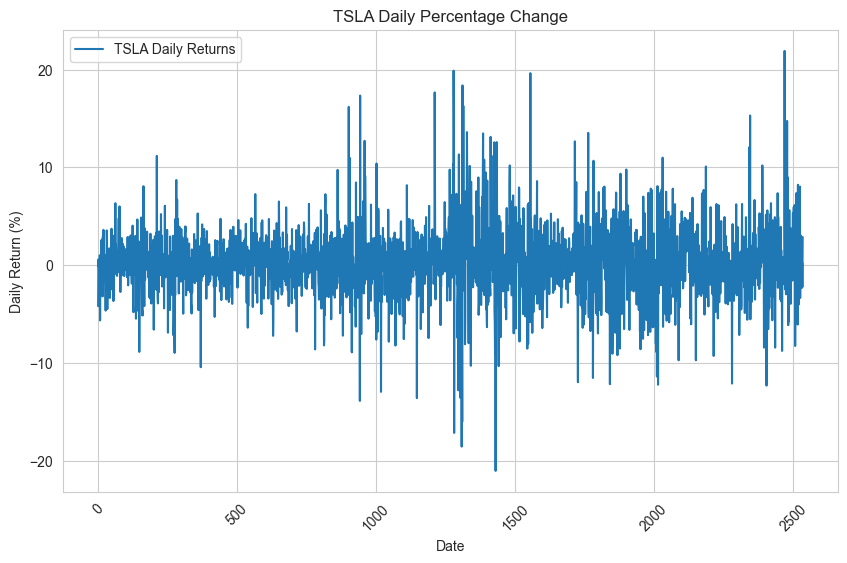

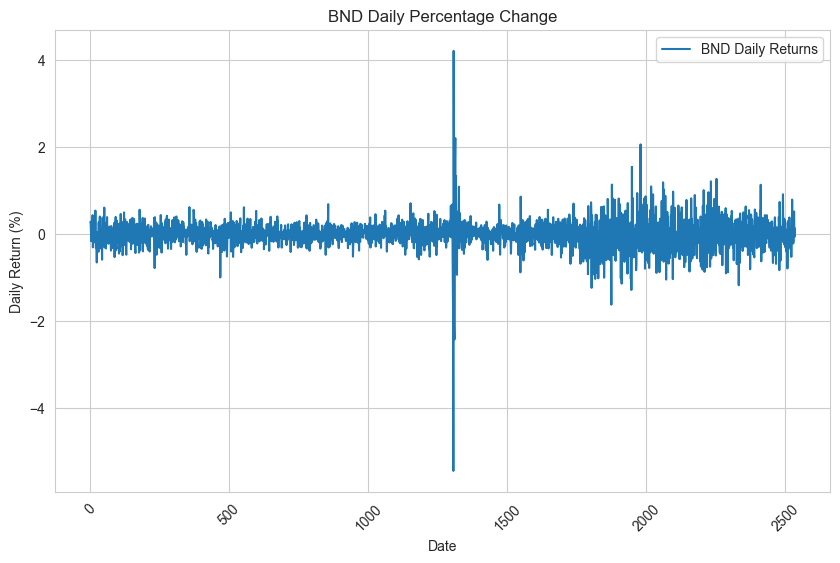

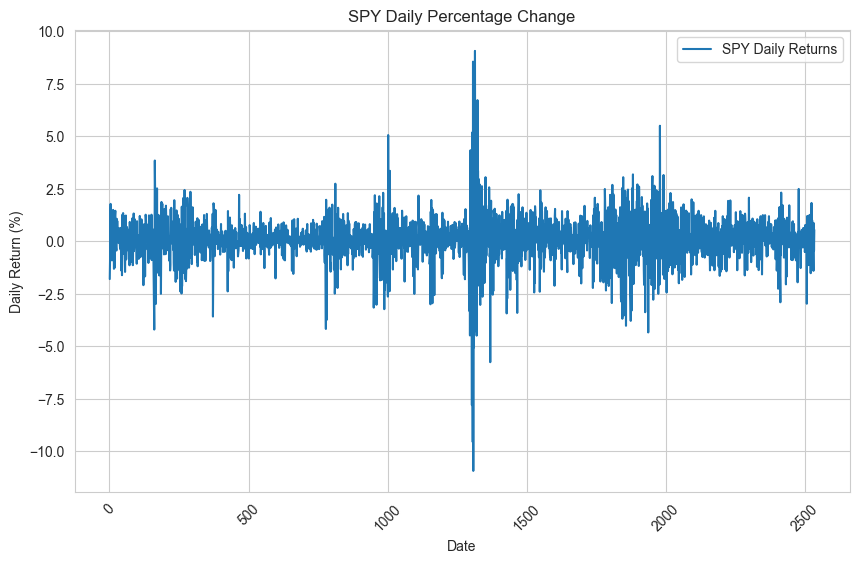

In [32]:
plot_daily_percentage([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])


>> ## Unusual High/Low Returns

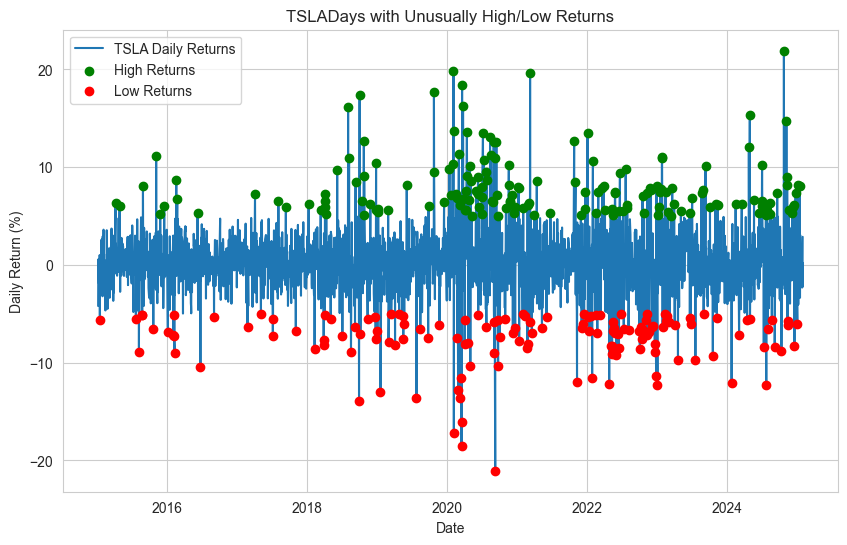

TSLAHigh Returns for:
Price      Daily Return
Ticker                 
Date                   
2015-04-06     6.335084
2015-04-27     6.006504
2015-08-27     8.072407
2015-11-04    11.173506
2015-11-25     5.218781
...                 ...
2024-12-11     5.930322
2024-12-16     6.141251
2024-12-24     7.357174
2025-01-03     8.215567
2025-01-15     8.038151

[169 rows x 1 columns]


TSLALow Returns for:
Price      Daily Return
Ticker                 
Date                   
2015-01-14    -5.659734
2015-07-21    -5.487851
2015-08-06    -8.884613
2015-08-20    -5.120475
2015-08-24    -5.156654
...                 ...
2024-10-11    -8.782511
2024-11-12    -6.145717
2024-11-14    -5.771560
2024-12-18    -8.279494
2025-01-02    -6.081616

[142 rows x 1 columns]




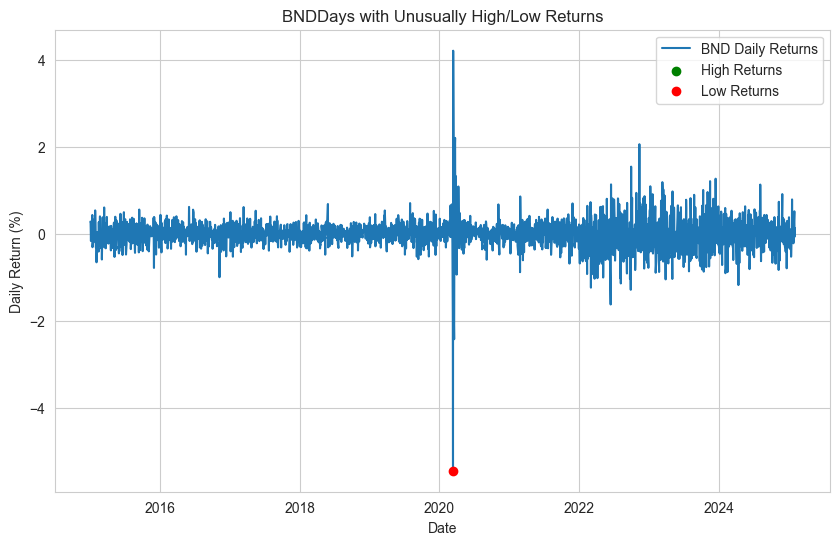

BNDHigh Returns for:
Empty DataFrame
Columns: [(Daily Return, )]
Index: []


BNDLow Returns for:
Price      Daily Return
Ticker                 
Date                   
2020-03-12    -5.438459




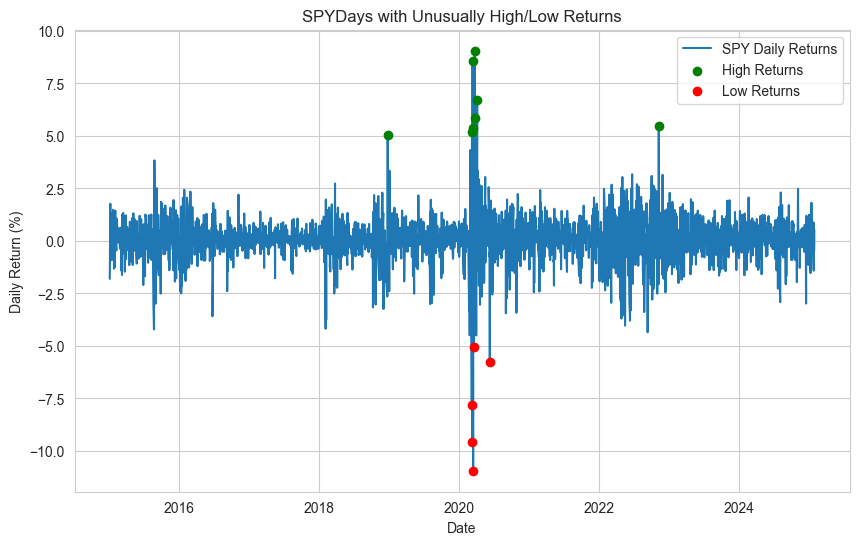

SPYHigh Returns for:
Price      Daily Return
Ticker                 
Date                   
2018-12-26     5.052507
2020-03-10     5.174470
2020-03-13     8.548653
2020-03-17     5.399212
2020-03-24     9.060307
2020-03-26     5.838962
2020-04-06     6.716624
2022-11-10     5.495414


SPYLow Returns for:
Price      Daily Return
Ticker                 
Date                   
2020-03-09    -7.809413
2020-03-12    -9.567722
2020-03-16   -10.942395
2020-03-18    -5.063295
2020-06-11    -5.764873




In [33]:
# Ensure 'Daily Return' exists and 'Date' is the index
for df in [tsla_data, bnd_data, spy_data]:
    if 'Close' in df.columns and 'Daily Return' not in df.columns:
        df['Daily Return'] = df['Close'].pct_change() * 100  
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

# Call the function
plot_significant_anomalies([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])


> ### ❄ Time Series Decomposition

>> ## Seasonality and Trends

<Figure size 1200x600 with 0 Axes>

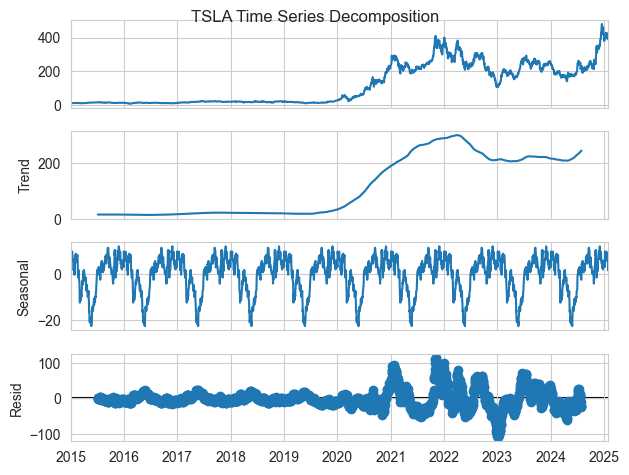

<Figure size 1200x600 with 0 Axes>

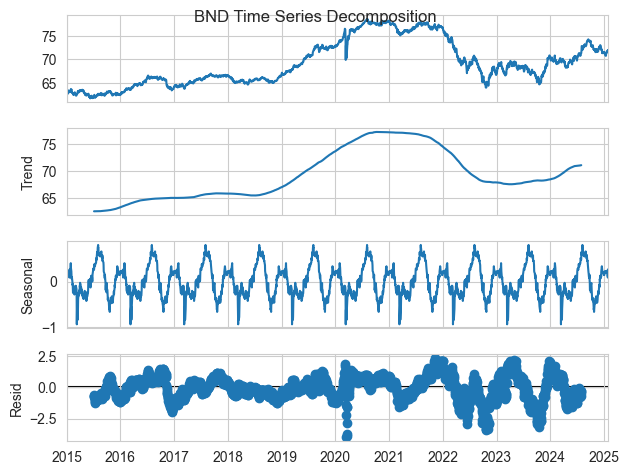

<Figure size 1200x600 with 0 Axes>

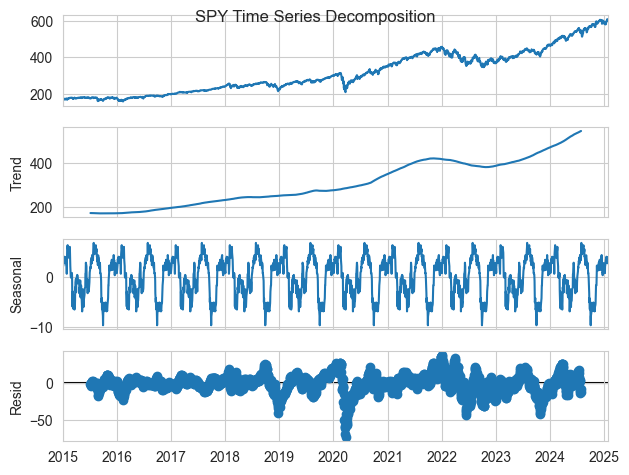

In [34]:
timeSeriesDecomposition([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


>> ## Volatility with separate lines for Adjusted Close, Rolling Mean, and Rolling Std Dev

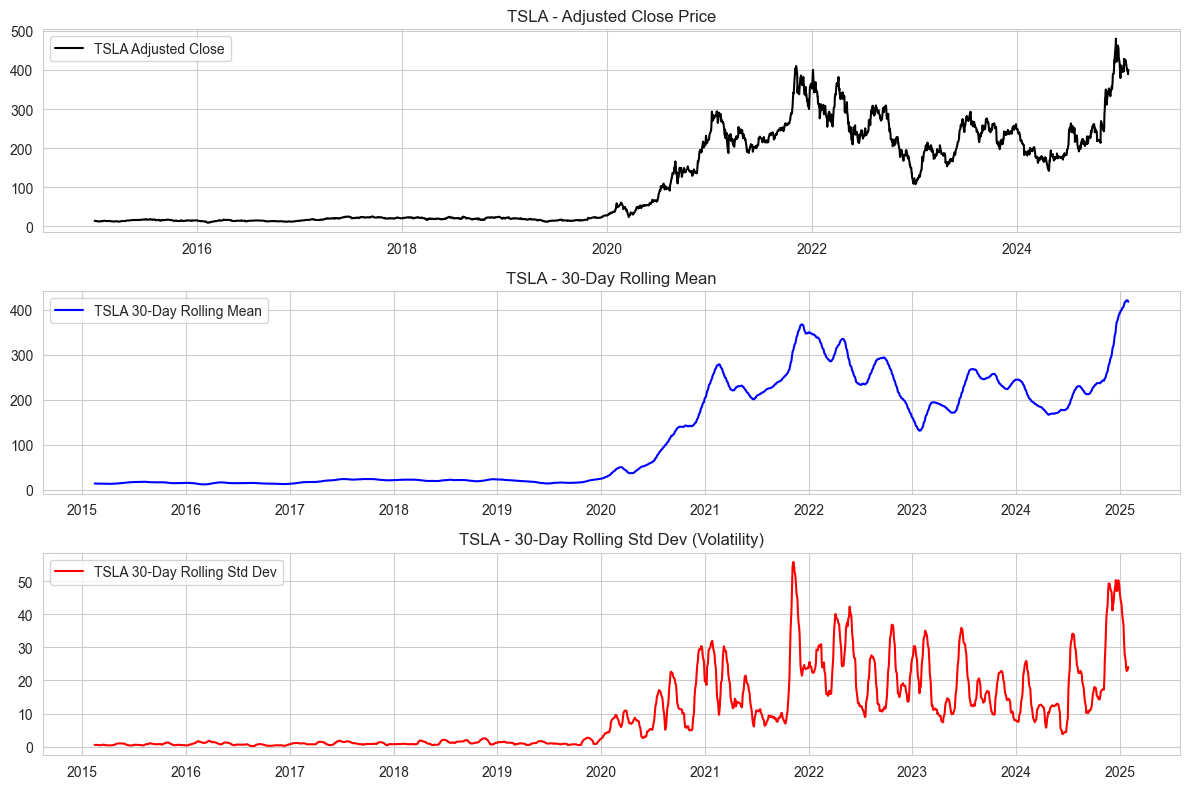

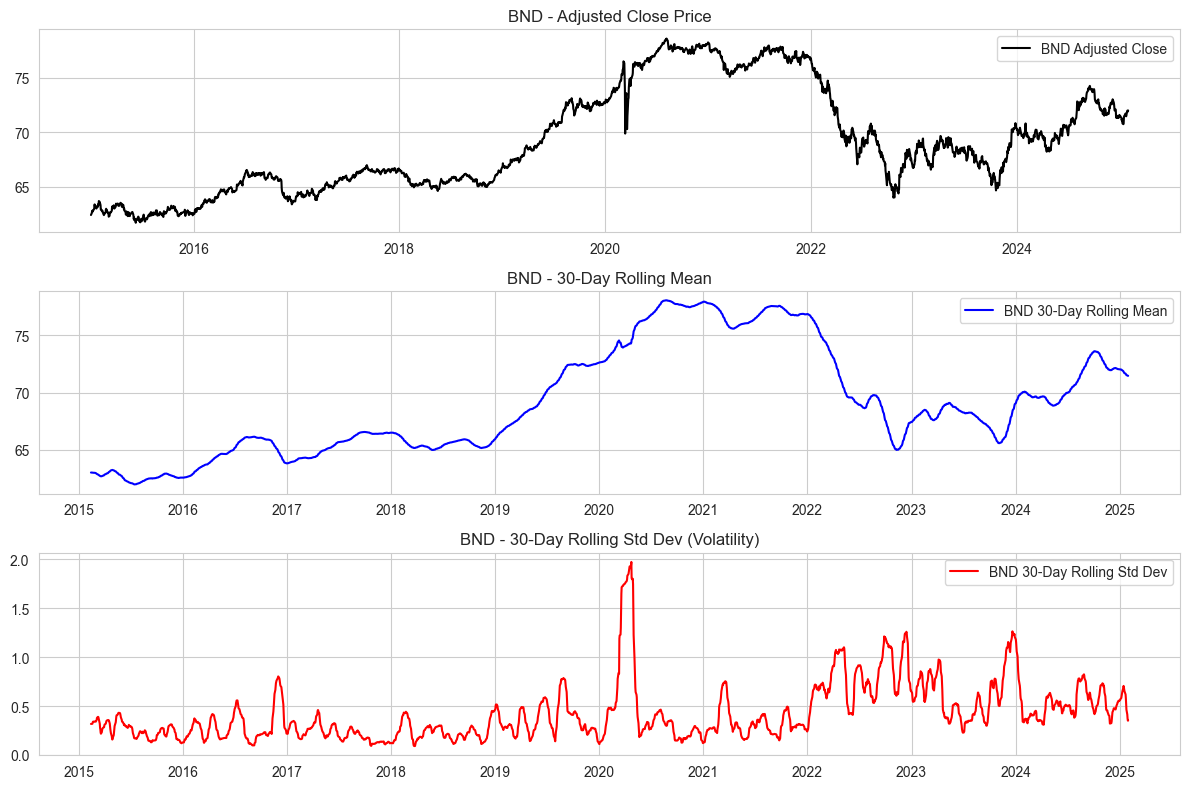

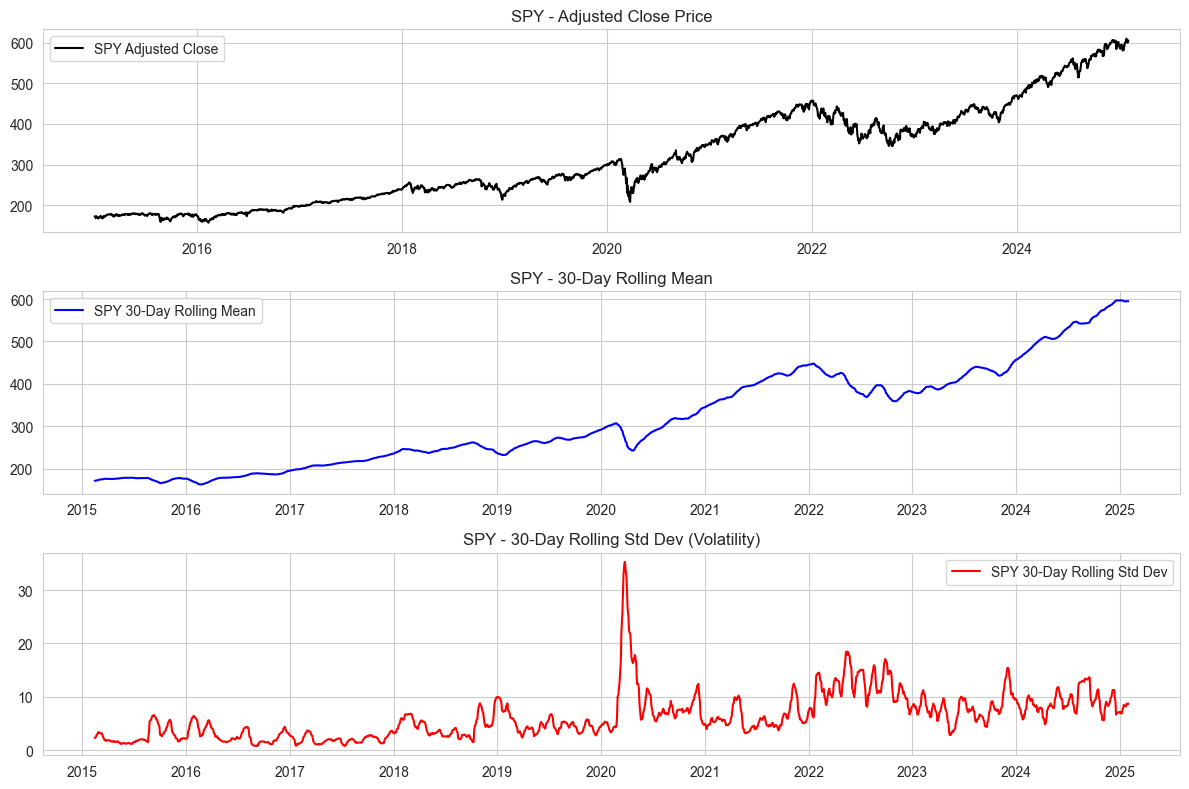

In [35]:
# Define the window size for rolling calculations
window_size = 30  # 30 days

volatility_rolling(window_size, [tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])


> ### ❗Value at Risk(VaR) and Sharpe Ratio

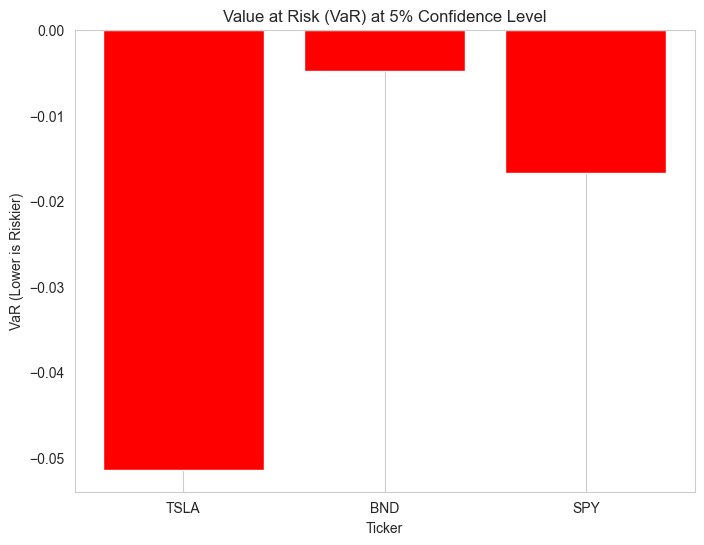

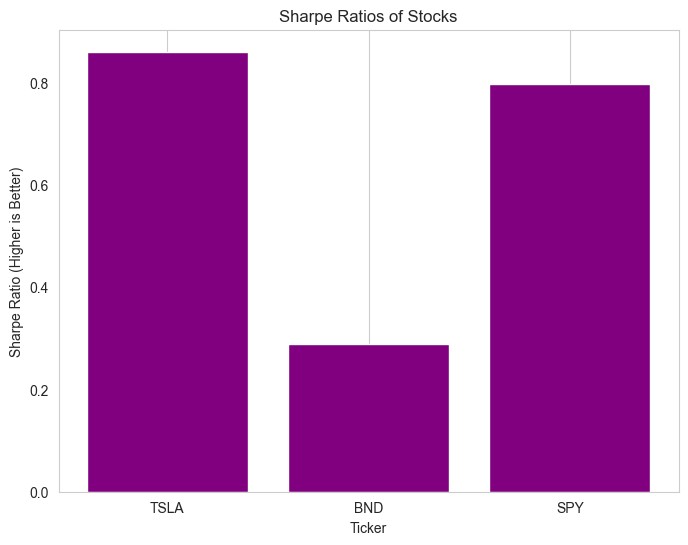


Value at Risk (VaR) at 5% Confidence Level:
TSLA: -0.0514
BND: -0.0048
SPY: -0.0167

Sharpe Ratios:
TSLA: 0.8607
BND: 0.2890
SPY: 0.7975


In [36]:
varAndSharpeRatio([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


> # Develop Time Series Forecasting Models

### This task involves building a time series forecasting model to predict Tesla's future stock prices. You will choose from classical statistical models like ARIMA and SARIMA, or deep learning models like LSTM.
        - Step 1: Load and Prepare the Data
        - Step 2: Split the Data
               - 80% of the data for training and 20% for testing.
        - Step 3: Choose and Train the Model
        - step 4: Evaluate the Model Performance using MAE,RMSE,MAPE
        - Step 5: Optimize Model Parameters
                  - using auto_arima from pmdarima
                  - Hyperparameter Tuning for LSTM: using epochs, and batch sizes to find the optimal configuration
        - Step 6: Forecast Future Prices
                 - Make Predictions using the final chosen model 


Running forecasting for Tesla (TSLA)...


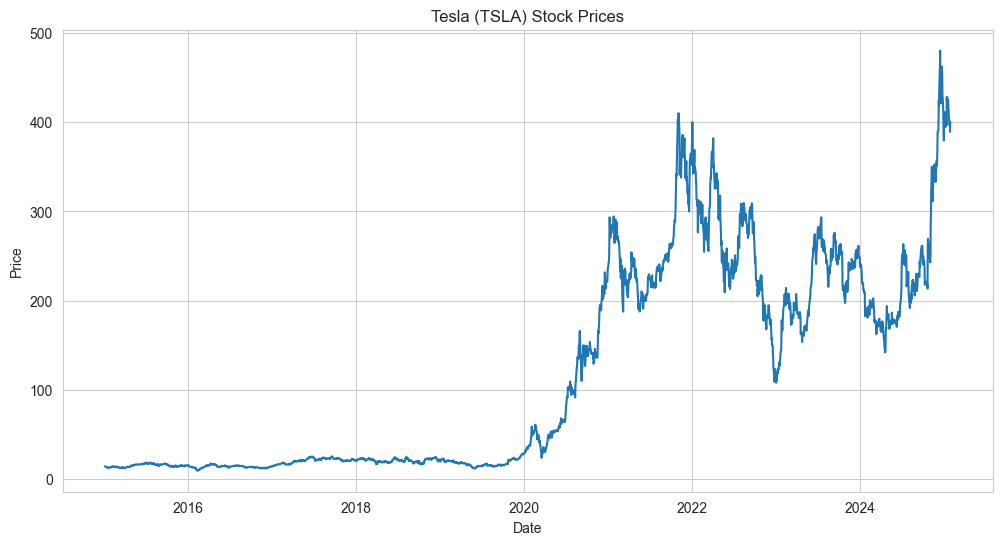

d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/10


d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0175
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0011
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0010
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 9.2063e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 7.6291e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 8.6186e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 6.4318e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 5.1582e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 6.7330e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 6.3784e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Tesla (TSLA) - ARIMA - MAE: 66.20274980333116, RMSE: 75.4063207759742, MAPE: 29.518710980115316
Tesla (TSLA) - SARIMA - MAE: 54.922857263469204, RMSE: 66.29209008813972, MAPE: 24.039078461288103
Tesla (TSLA) - LSTM - MAE: 8.32943721347385, RMSE: 10.699703542444112, MAPE: 19.8

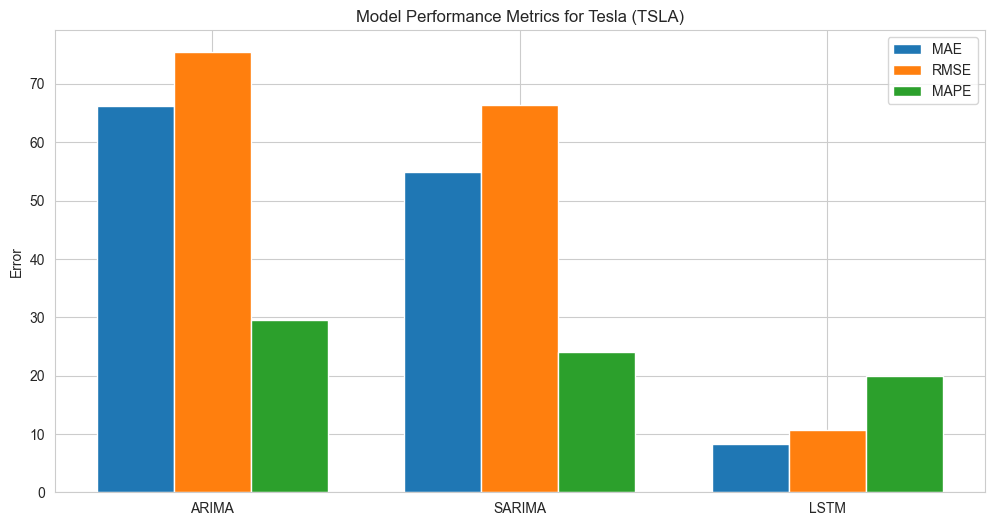

In [37]:
# Run forecasting for Tesla
from scripts.features import*
# results_tesla = run_forecasting(['tesla']['Close'], 'Tesla (TSLA)',seasonal_order=(1, 1, 1, 12))
results_tesla = run_forecasting(tsla_data['Close'], 'Tesla (TSLA)', seasonal_order=(1, 1, 1, 12))



Running forecasting for Vanguard Total Bond Market ETF (BND)...


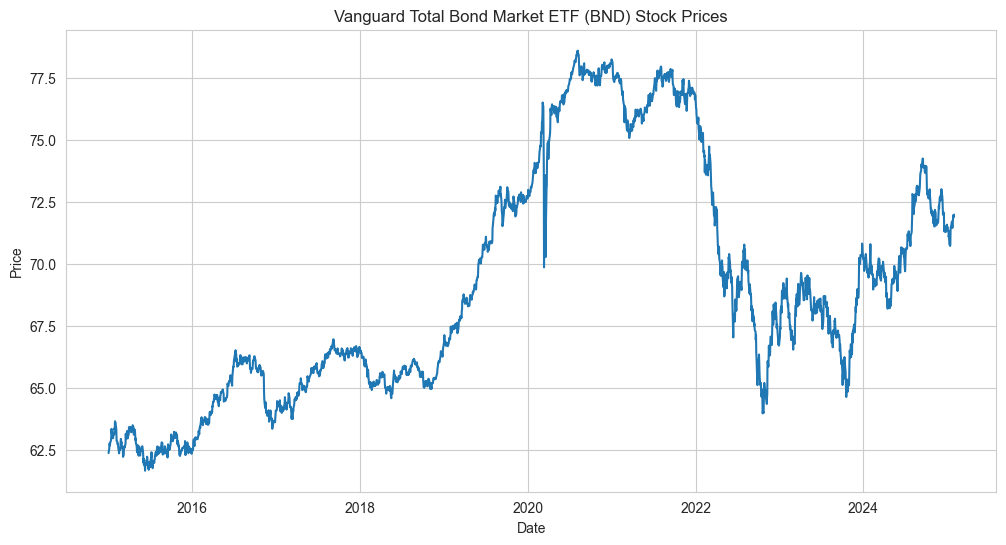

d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - loss: 0.0528
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0011
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0011
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.0011
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0011
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 8.8588e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 7.4798e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 7.8772e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 7.9711e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 8.7091e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step
Vanguard Total Bond Market ETF (BND) - ARIMA - MAE: 1.0789245520910753, RMSE: 1.3681968662660635, MAPE: 1.5900345705150607
Vanguard Total Bond Market ETF (BND) - SARIMA - MAE: 1.2580378421181706, RMSE: 1.5274495851845415, MAPE: 1.7303339370671758
Vanguard Total Bond Market E

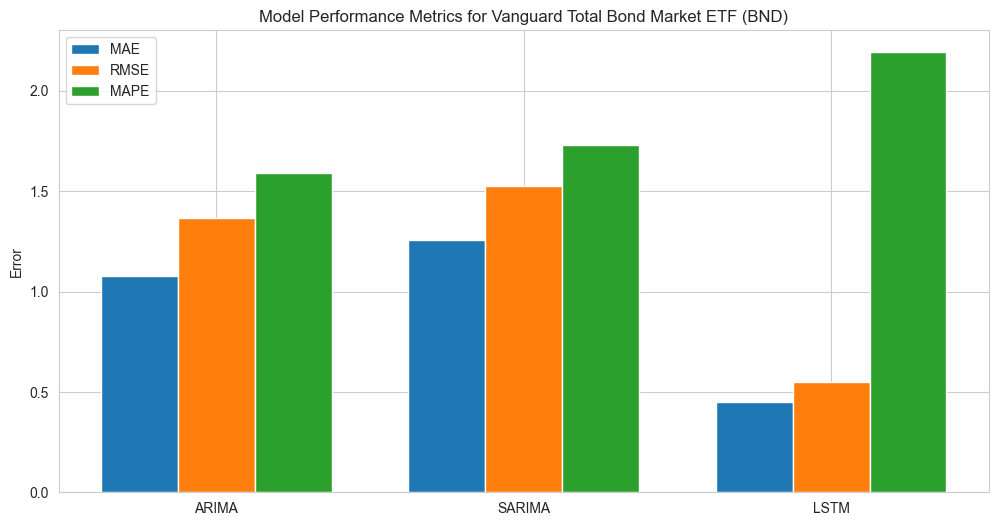

In [38]:
# Run forecasting for Vanguard Total Bond Market ETF
result_bond = run_forecasting(bnd_data['Close'],  'Vanguard Total Bond Market ETF (BND)',seasonal_order=(1, 1, 1, 12))


Running forecasting for SPDR S&P 500 ETF Trust (SPY)...


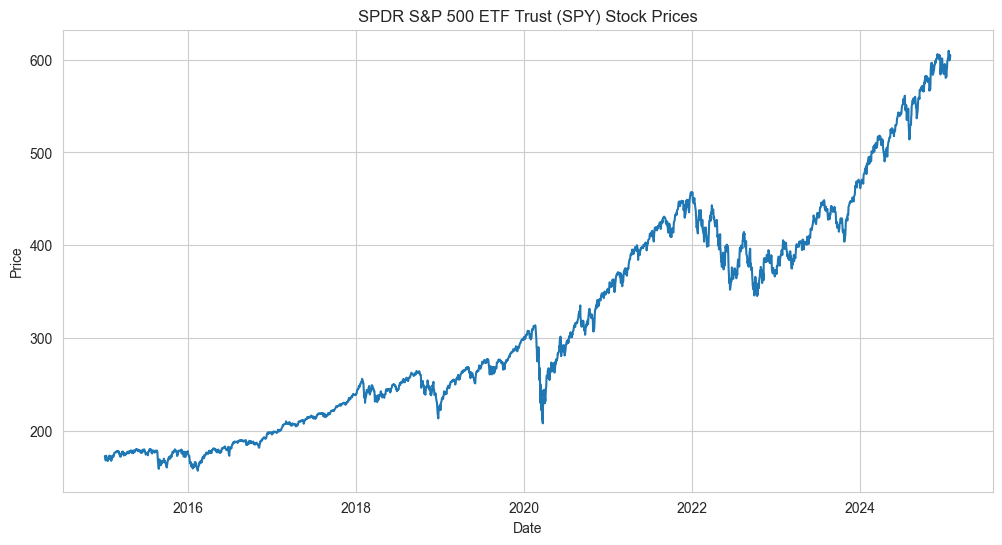

d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/10


d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0552
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 7.0506e-04
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 5.5714e-04
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 6.4478e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 6.2818e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.9876e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 6.8213e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 5.4964e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 4.9294e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.4686e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
SPDR S&P 500 ETF Trust (SPY) - ARIMA - MAE: 42.02040632779722, RMSE: 54.04170377775045, MAPE: 10.004966322128537
SPDR S&P 500 ETF Trust (SPY) - SARIMA - MAE: 42.67241589414808, RMSE: 54.651660194497694, MAPE: 10.091279436632625
SPDR S&P 500 ETF Trust (SPY) - LSTM - MAE: 5.8

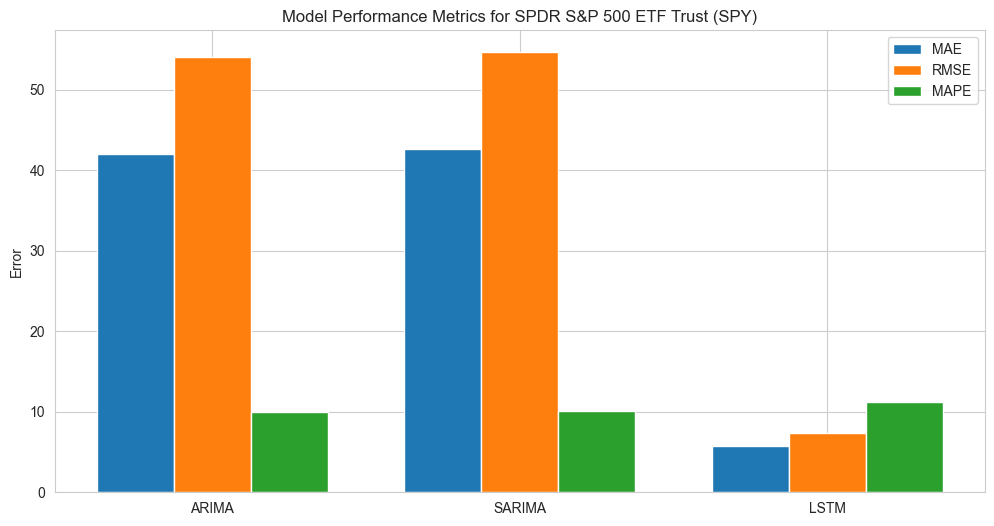

In [39]:
# Run forecasting for SPDR S&P 500 ETF Trust
result_spy = run_forecasting(spy_data['Close'], 'SPDR S&P 500 ETF Trust (SPY)',seasonal_order=(1, 1, 1, 12))


> # 📊 Forecast Future Market Trends

### This task focuses on using the trained model from Task 2 to predict Tesla's future stock prices for 6-12 months. We will analyze the forecast results, visualize trends, assess risks, and provide insights.
          - Step 1: Load the Trained Model
          - Step 2: Generate Future Forecasts
          - Step 3: Visualize the Forecast
          - Step 4: Include Confidence Intervals
          - Step 5: Interpret the Results
          - Step 6: Identify Market Opportunities and Risks

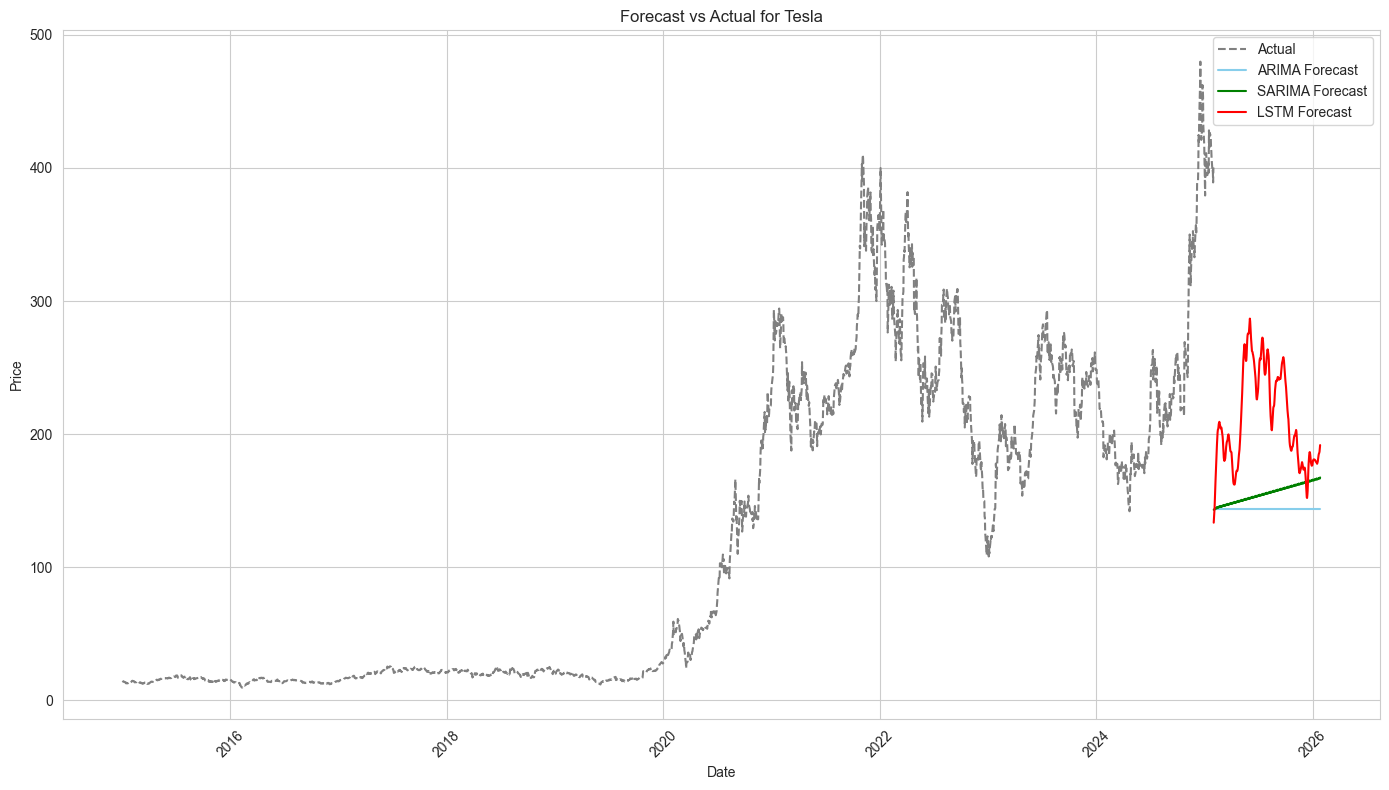


Summary of Model Performance for Tesla:
ARIMA - MAE: 66.2027, RMSE: 75.4063, MAPE: 29.52%
SARIMA - MAE: 54.9229, RMSE: 66.2921, MAPE: 24.04%
LSTM - MAE: 8.3294, RMSE: 10.6997, MAPE: 19.89%

Best Model for Tesla based on MAPE: LSTM



In [40]:

forecast(tsla_data, results_tesla,'Tesla')

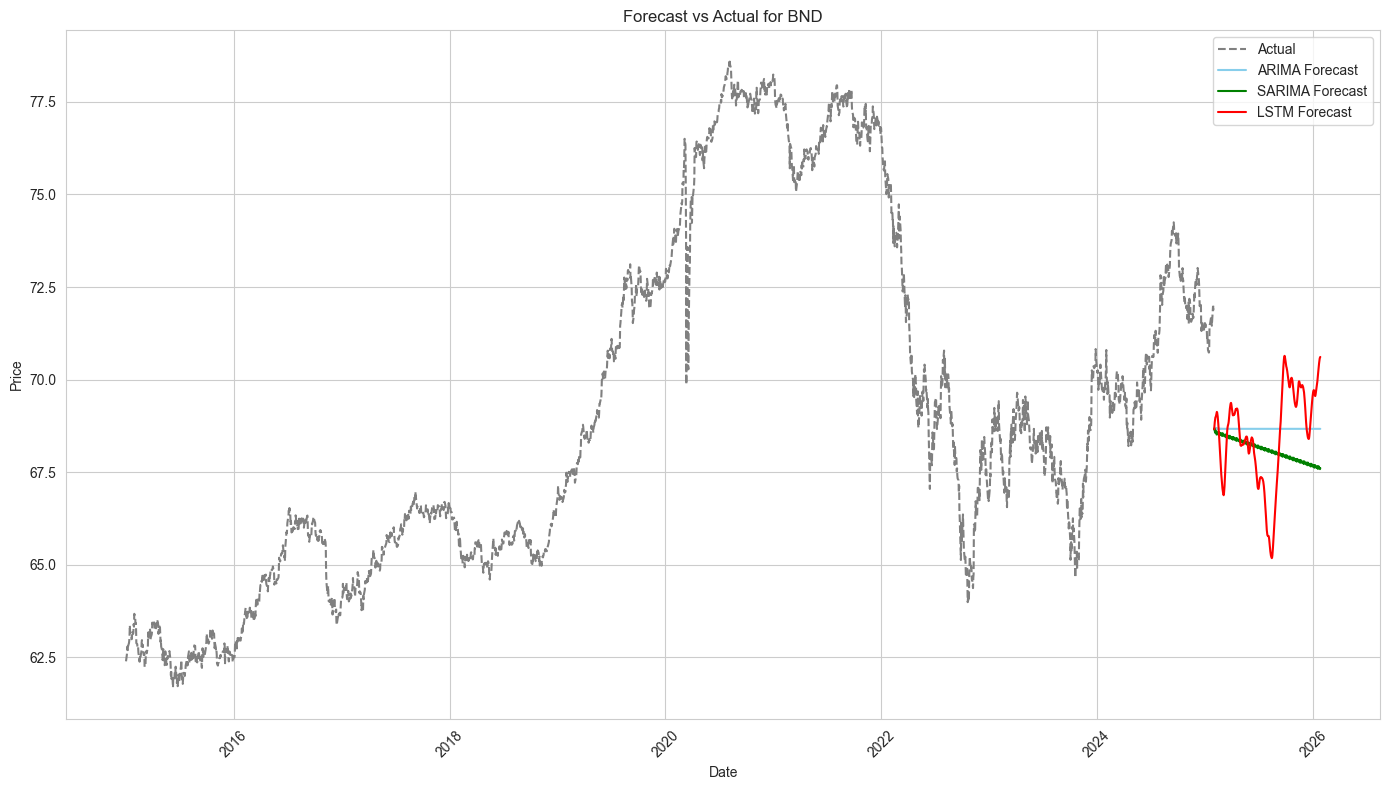


Summary of Model Performance for BND:
ARIMA - MAE: 1.0789, RMSE: 1.3682, MAPE: 1.59%
SARIMA - MAE: 1.2580, RMSE: 1.5274, MAPE: 1.73%
LSTM - MAE: 0.4518, RMSE: 0.5509, MAPE: 2.19%

Best Model for BND based on MAPE: ARIMA



In [41]:

forecast(bnd_data, result_bond,'BND')

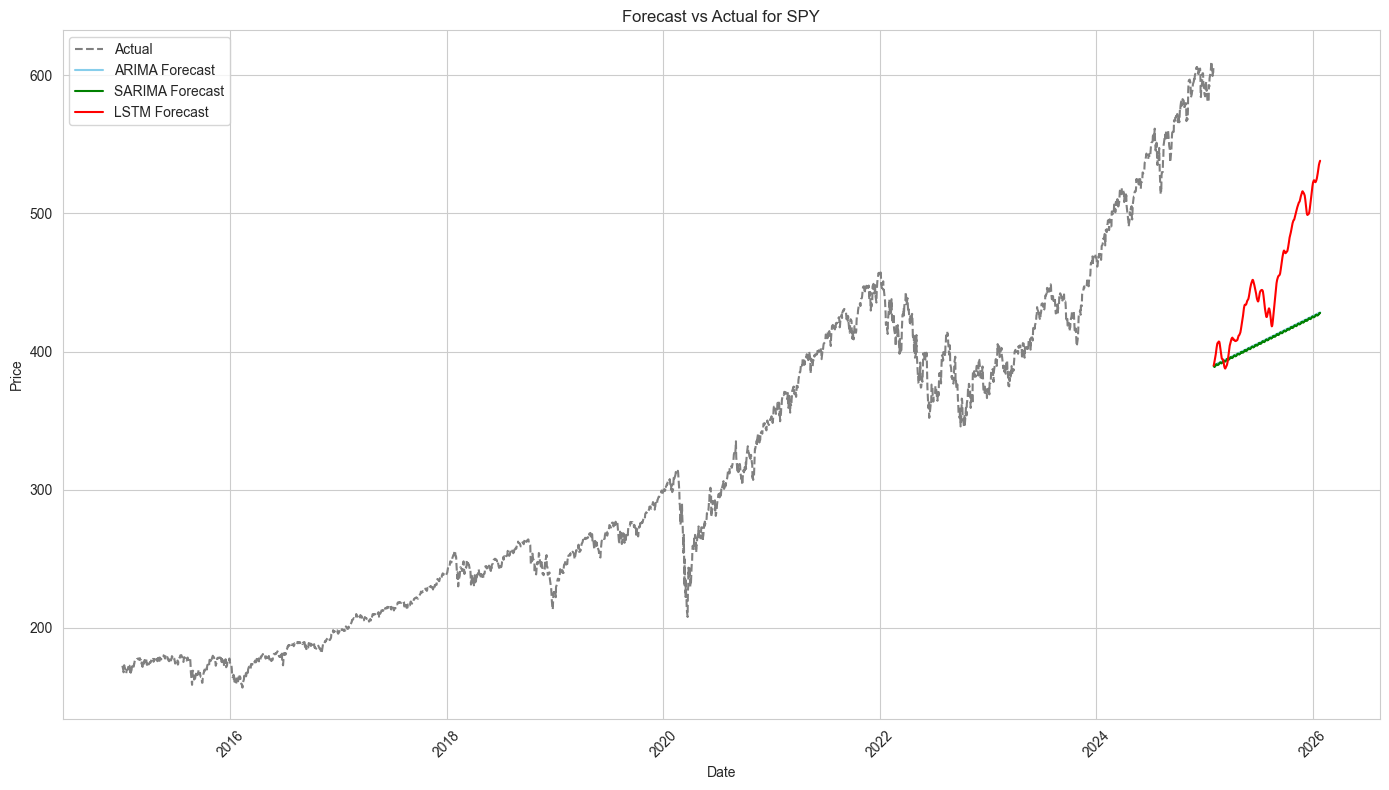


Summary of Model Performance for SPY:
ARIMA - MAE: 42.0204, RMSE: 54.0417, MAPE: 10.00%
SARIMA - MAE: 42.6724, RMSE: 54.6517, MAPE: 10.09%
LSTM - MAE: 5.8071, RMSE: 7.4242, MAPE: 11.26%

Best Model for SPY based on MAPE: ARIMA



In [42]:
forecast(spy_data, result_spy,'SPY')

> # 📈 Optimize Portfolio Based on Forecast

In [43]:
# Create a dictionary containing the datasets
stockData = {
    'tesla': tsla_data,
    'bond': bnd_data,
    'spy': spy_data
}

# Call the function
stockData = reset_index(stockData)



In [44]:
df = merge_data(stockData)

In [45]:
annual_returns = calculate_returns(df)
annual_returns

{'TSLA': 0.6347089573131546,
 'BND': 0.015844433252275802,
 'SPY': 0.1505905572150228}

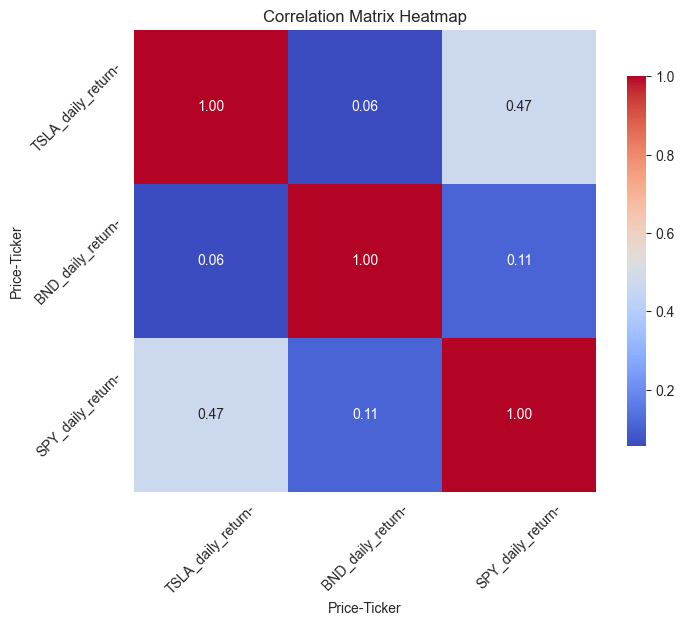

In [46]:
daily_returns = df[['TSLA_daily_return', 'BND_daily_return', 'SPY_daily_return']]

correlation_returns(daily_returns)

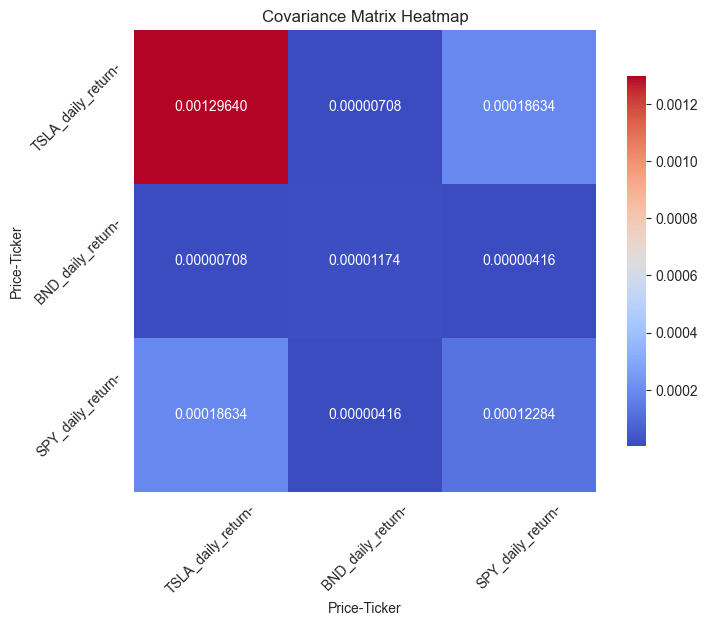

In [47]:
covariance_returns(daily_returns)

In [48]:
portfolio_annual_return(df)

0.3212750272991711

In [49]:
expected_returns = df[['TSLA_daily_return', 'BND_daily_return', 'SPY_daily_return']].mean()
cov_matrix = df[['TSLA_daily_return', 'BND_daily_return', 'SPY_daily_return']].cov()

optimal_weights, portfolio_annual_return,weighted_daily_return = optimal_portfolio_sharpe(expected_returns,cov_matrix,df)
print("Optimal Weights:", optimal_weights)
print("Portfolio Annual Return:", portfolio_annual_return)
print("Weighted Daily Return Head:", weighted_daily_return.head())

Optimal Weights: [0.1463672  0.48356768 0.37006512]
Portfolio Annual Return: 0.14053527047340486
Weighted Daily Return Head: 0         NaN
1   -0.011433
2   -0.001257
3    0.004674
4    0.005582
dtype: float64


In [50]:
optimal_weights, portfolio_annual_return,weighted_daily_return = optimal_portfolio_sharpe(expected_returns,cov_matrix,df)

In [51]:
portfolio_variance(optimal_weights,cov_matrix)

0.13283398967051605

In [52]:
df['TSLA_daily_return'] = df['TSLA_daily_return'].fillna(df['TSLA_daily_return'].mean())
df['TSLA_daily_return'].isna().sum()

0

In [53]:
results, var_Tesla, sharpe_ratio, annualized_sharpe_ratio, portfolio_volatility, average_portfolio_return = total_portfolio(df,weighted_daily_return)
results_df = pd.DataFrame.from_dict(results, orient='index', columns=["Value"])
print(results_df)


                                          Value
Average Portfolio Return (Daily)       0.000522
Portfolio Volatility (Daily)           0.008368
Tesla VaR (95% confidence)            -0.051373
Tesla VaR (Parametric 95% confidence) -0.057260
Sharpe Ratio (Daily)                   0.062377
Annualized Portfolio Return            0.140535
Annualized Portfolio Volatility        0.132834
Annualized Sharpe Ratio                1.057977


>>> ### Daily returns with VaR

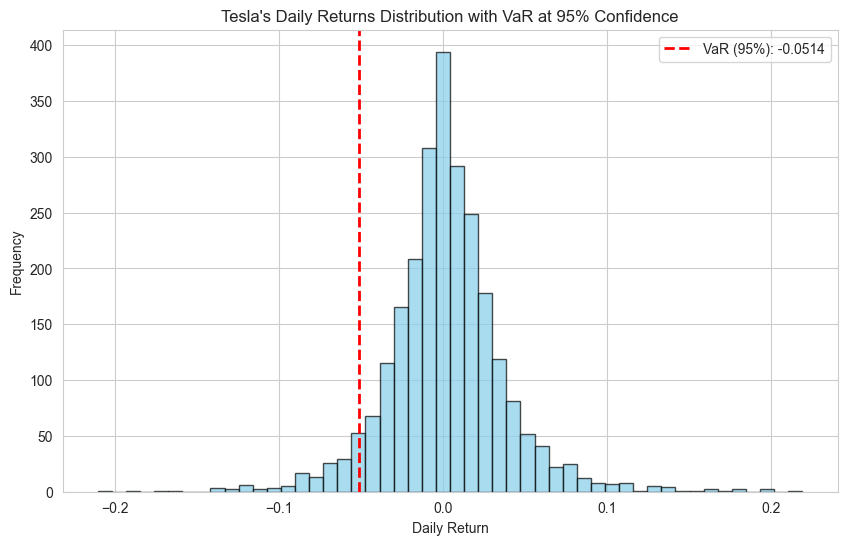

In [54]:
daily_plot_VaR(df,var_Tesla)